In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop

In [28]:
train_data_gen = ImageDataGenerator(rescale=1./255)
test_data_gen = ImageDataGenerator(rescale=1./255)

In [29]:
tf.random.set_seed(42)
train_generator = train_data_gen.flow_from_directory('FER2013/train',
                                                    target_size=(64,64),
                                                    color_mode="grayscale",
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    seed = 42,
                                                    shuffle = True)

Found 28709 images belonging to 7 classes.


In [30]:
tf.random.set_seed(42)
test_generator = test_data_gen.flow_from_directory('FER2013/test',
                                                  target_size=(64,64),
                                                  color_mode="grayscale",
                                                  batch_size=32,
                                                  class_mode='categorical',
                                                  seed = 42)

Found 7178 images belonging to 7 classes.


In [31]:
test_dir = "FER2013/test"
train_dir = "FER2013/train"

IMAGE_SHAPE = (64,64)
BATCH_SIZE = 32

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(1/255.)
test_datagen = ImageDataGenerator(1/255.)
print("training_data")
training_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                   label_mode= "categorical",
                                                                   image_size= IMAGE_SHAPE,
                                                                   batch_size = BATCH_SIZE)

print("testing_data")
testing_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                   label_mode= "categorical",
                                                                   image_size= IMAGE_SHAPE,
                                                                   batch_size = BATCH_SIZE,
                                                                   shuffle = False)

training_data
Found 28709 files belonging to 7 classes.
testing_data
Found 7178 files belonging to 7 classes.


In [37]:
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, Dropout, Flatten, Dense
from keras.optimizers import Adam

# Define the number of classes
no_of_classes = 7

# Create the Sequential model
model_1 = Sequential()

# 1st Convolutional Layer
model_1.add(Conv2D(64, (3, 3), padding='same', input_shape=(64, 64, 1)))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model_1.add(Dropout(0.25))

# 2nd Convolutional Layer
model_1.add(Conv2D(128, (3, 3), padding='same'))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model_1.add(Dropout(0.25))

# 3rd Convolutional Layer
model_1.add(Conv2D(128, (3, 3), padding='same'))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model_1.add(Dropout(0.25))

# 4th Convolutional Layer
model_1.add(Conv2D(512, (3, 3), padding='same'))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model_1.add(Dropout(0.25))

#5th Convolutional Layer
model_1.add(Conv2D(512, (3, 3), padding='same'))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model_1.add(Dropout(0.25))

# Flatten the output from convolutional layers
model_1.add(Flatten())

# 1st Fully Connected Layer
model_1.add(Dense(256))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(Dropout(0.25))

# 2nd Fully Connected Layer
model_1.add(Dense(512))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(Dropout(0.25))

# Output Layer
model_1.add(Dense(no_of_classes, activation='softmax'))

# Compile the model
opt = Adam(learning_rate=0.001)
model_1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary to view the architecture
model_1.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)                   │ (None, 64, 64, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_28               │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_28 (Activation)           │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_29               │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_29 (Activation)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_30               │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_30 (Activation)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 8, 8, 512)           │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_31               │ (None, 8, 8, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_31 (Activation)           │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,840,391 (14.65 MB)

 Trainable params: 3,836,167 (14.63 MB)

 Non-trainable params: 4,224 (16.50 KB)

In [38]:
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
checkpoint = ModelCheckpoint("./model.keras", monitor='val_acc', verbose=1, save_best_only=True, mode='max')


# early_stopping = EarlyStopping(monitor='val_loss',
#                           min_delta=0,
#                           patience=3,
#                           verbose=1,
#                           restore_best_weights=True
#                           )

early_stopping = EarlyStopping(monitor = "val_loss",
                               min_delta = 0,
                               patience = 20,
                               verbose = 1,
                               mode = "auto",
                               restore_best_weights = True)


reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

In [39]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [40]:
history_1 = model_1.fit(train_generator,
                       epochs=10,
                       validation_data=test_generator,
                       callbacks=callbacks_list)

Epoch 1/10


C:\Users\Tanisha\anaconda3\envs\env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


898/898 ━━━━━━━━━━━━━━━━━━━━ 1162s 1s/step - accuracy: 0.2638 - loss: 1.9258 - val_accuracy: 0.4395 - val_loss: 1.4531 - learning_rate: 0.0010
Epoch 2/10


C:\Users\Tanisha\anaconda3\envs\env\Lib\site-packages\keras\src\callbacks\model_checkpoint.py:206: UserWarning: Can save best model only with val_acc available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


898/898 ━━━━━━━━━━━━━━━━━━━━ 844s 940ms/step - accuracy: 0.4401 - loss: 1.4605 - val_accuracy: 0.4583 - val_loss: 1.3857 - learning_rate: 0.0010
Epoch 3/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 765s 852ms/step - accuracy: 0.5036 - loss: 1.2924 - val_accuracy: 0.5084 - val_loss: 1.2870 - learning_rate: 0.0010
Epoch 4/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 753s 838ms/step - accuracy: 0.5443 - loss: 1.2031 - val_accuracy: 0.5426 - val_loss: 1.1925 - learning_rate: 0.0010
Epoch 5/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 620s 691ms/step - accuracy: 0.5587 - loss: 1.1646 - val_accuracy: 0.5591 - val_loss: 1.1370 - learning_rate: 0.0010
Epoch 6/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 751s 836ms/step - accuracy: 0.5786 - loss: 1.1117 - val_accuracy: 0.4953 - val_loss: 1.3138 - learning_rate: 0.0010
Epoch 7/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 761s 847ms/step - accuracy: 0.5964 - loss: 1.0746 - val_accuracy: 0.5880 - val_loss: 1.0870 - learning_rate: 0.0010
Epoch 8/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 729s 810ms/step - accuracy: 0.6147 

In [46]:
final_epoch = 20
history_2 = model_1.fit(train_generator,
                        epochs= final_epoch,
                        validation_data=test_generator,
                        callbacks=callbacks_list,
                        initial_epoch = history_1.epoch[-1])

Epoch 10/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 874s 969ms/step - accuracy: 0.6415 - loss: 0.9579 - val_accuracy: 0.6266 - val_loss: 0.9985 - learning_rate: 2.0000e-04
Epoch 11/20


C:\Users\Tanisha\anaconda3\envs\env\Lib\site-packages\keras\src\callbacks\model_checkpoint.py:206: UserWarning: Can save best model only with val_acc available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


898/898 ━━━━━━━━━━━━━━━━━━━━ 846s 941ms/step - accuracy: 0.6586 - loss: 0.9144 - val_accuracy: 0.6268 - val_loss: 1.0117 - learning_rate: 2.0000e-04
Epoch 12/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 631s 702ms/step - accuracy: 0.6760 - loss: 0.8763 - val_accuracy: 0.6212 - val_loss: 1.0223 - learning_rate: 2.0000e-04
Epoch 13/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 693ms/step - accuracy: 0.6856 - loss: 0.8474
Epoch 13: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
898/898 ━━━━━━━━━━━━━━━━━━━━ 652s 725ms/step - accuracy: 0.6856 - loss: 0.8474 - val_accuracy: 0.6297 - val_loss: 1.0050 - learning_rate: 2.0000e-04
Epoch 14/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 700s 779ms/step - accuracy: 0.6987 - loss: 0.8015 - val_accuracy: 0.6457 - val_loss: 0.9755 - learning_rate: 4.0000e-05
Epoch 15/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 719s 800ms/step - accuracy: 0.6995 - loss: 0.7946 - val_accuracy: 0.6470 - val_loss: 0.9780 - learning_rate: 4.0000e-05
Epoch 16/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 648s 721ms/

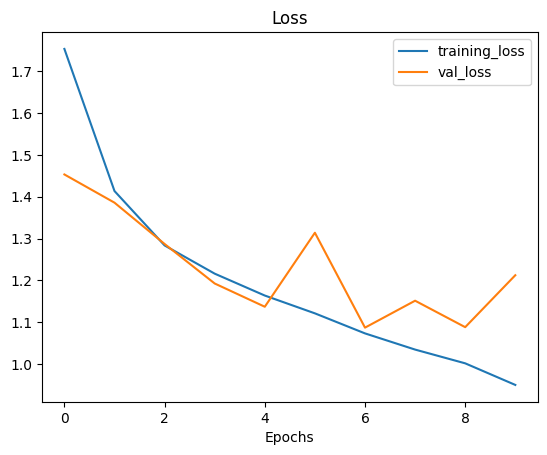

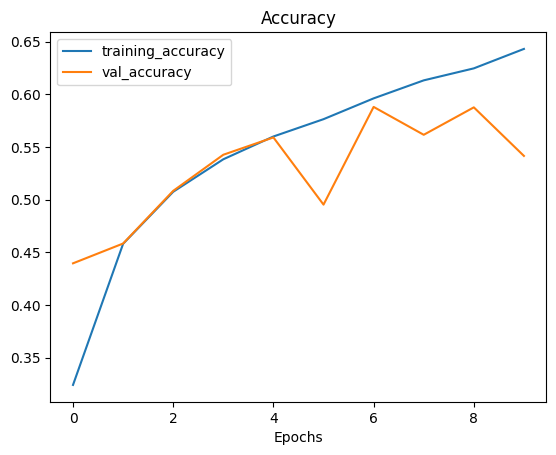

In [47]:
plot_loss_curves(history_1)

In [51]:
def compare_historys(original_history, new_history, initial_epochs=10):
    """
    Compares two model history objects.
    """
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    print(len(acc))

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    print(len(total_acc))
    print(total_acc)

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()


10
21
[0.3240795433521271, 0.45807933807373047, 0.50747150182724, 0.5383329391479492, 0.5599637627601624, 0.5764046311378479, 0.596154510974884, 0.6132571697235107, 0.624647319316864, 0.6431084275245667, 0.6413668394088745, 0.6589571237564087, 0.6737260222434998, 0.6820509433746338, 0.6964715123176575, 0.7021491527557373, 0.7055975198745728, 0.7074436545372009, 0.7125639915466309, 0.714688777923584, 0.7135741114616394]


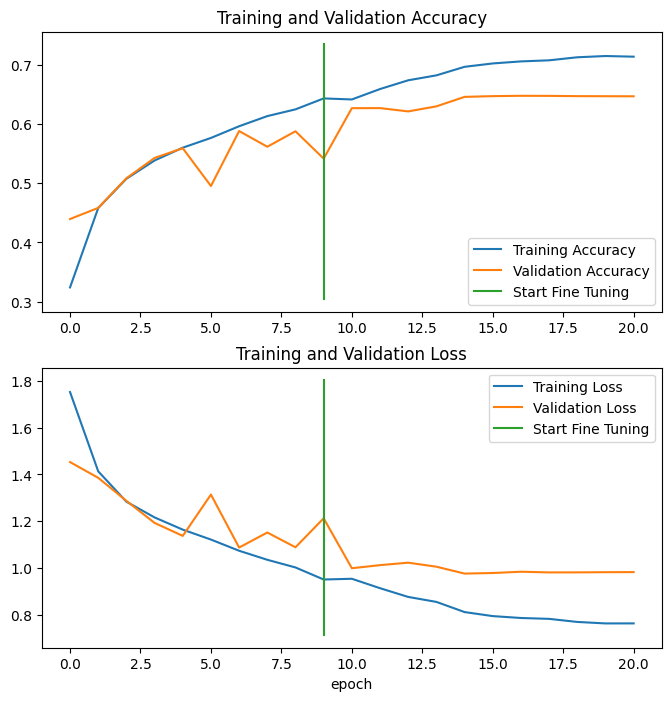

In [52]:
compare_historys(history_1, history_2, initial_epochs=10)

In [50]:
model_1.predict(test_generator)

225/225 ━━━━━━━━━━━━━━━━━━━━ 34s 151ms/step


array([[1.9449417e-01, 6.8645191e-01, 2.0825028e-02, ..., 9.5387734e-03,
        8.8561855e-02, 1.0272894e-04],
       [6.7173973e-02, 4.2462337e-04, 3.2226775e-02, ..., 2.4292953e-01,
        3.9743412e-01, 5.1733390e-03],
       [7.5302131e-02, 3.1803647e-04, 4.0784951e-02, ..., 7.6489592e-01,
        1.1662452e-01, 4.8490847e-04],
       ...,
       [2.5761297e-02, 2.4094086e-03, 1.1403389e-01, ..., 2.5388714e-02,
        1.0893153e-02, 8.1611794e-01],
       [4.4478504e-05, 8.7935837e-07, 3.9946510e-05, ..., 3.8570105e-04,
        1.0934700e-05, 3.1586398e-05],
       [1.3498330e-01, 7.7386874e-05, 2.9391488e-02, ..., 6.9148284e-01,
        9.9085845e-02, 1.2330934e-03]], dtype=float32)

In [53]:
model_1_json = model_1.to_json()
with open("CNN3.json", "w") as json_file:  # Change the filename here
    json_file.write(model_1_json)

In [54]:
model_1.save_weights('CNN3.weights.h5')